In [138]:
# !pip install seaborn
# !pip install scipy
# !pip install statsmodels

In [17]:
import numpy as np
import statistics as st
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import norm
from scipy.stats import skew
from scipy.stats import kurtosis
from matplotlib import pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

In [35]:
# константы
n = 1000             # объём выборки
mean = 6            # мат ожидание
std = 2             # СКО

random_arr = np.random.normal(mean, std, n)
random_arr.sort()                           # вариационный ряд
r_arr_pdf = norm.pdf(random_arr, mean, std) # плотность распределения
r_arr_cdf = norm.cdf(random_arr, mean, std) # функция распределения
np.round(np.var(random_arr), 2)

3.96

# ТЕОРИТИЧЕСКАЯ ЧАСТЬ

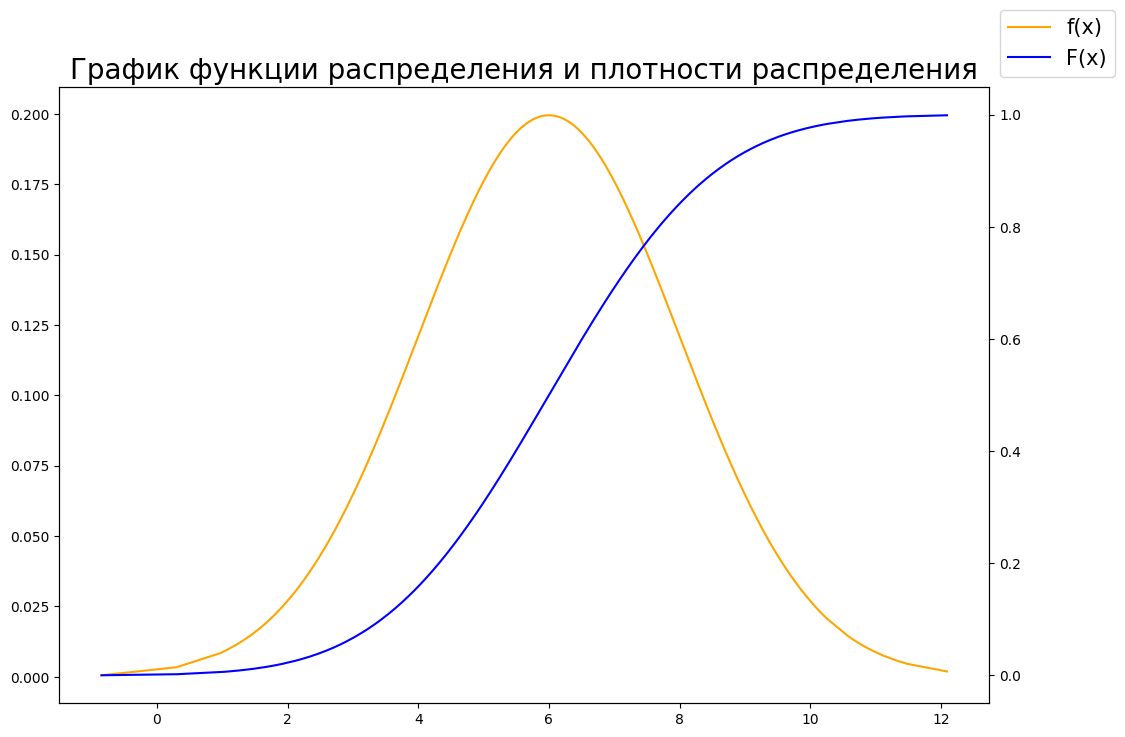

In [36]:
# создадим сетку из одной ячейки
fig, ax_left = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
ax_right = ax_left.twinx()

# на правой оси y построим график функции распределения
ax_right.plot(random_arr, r_arr_cdf, color='blue', label='F(x)')

# на левой оси y построим график плотности распределения
ax_left.plot(random_arr, r_arr_pdf, color='orange', label='f(x)')

fig.legend(loc='lower left',
           bbox_to_anchor=(1, 1),
           bbox_transform=ax_right.transAxes,
           prop={'size': 15})
ax_left.set_title('График функции распределения и плотности распределения', size=20)

plt.show()

## Основные статистики(теор. часть)

In [37]:
# Основные статистики
total = np.sum(random_arr)                               # сумма
median = np.median(random_arr)                           # медиана
var = np.var(random_arr)                                 # дисперсия
asd = np.std(random_arr)                                 # среднеквадратичное отклонение
mse = np.sqrt(asd)/n                                     # cреднеквадратичная ошибка
r_arr_min = np.min(random_arr)                           # минимум
r_arr_max = np.max(random_arr)                           # максимум
uq = np.quantile(random_arr, 0.75)                       # верхний квантиль
lq = np.quantile(random_arr, 0.25)                       # нижний квантиль
coef_asym = skew(random_arr, axis=0, bias=True)          # коэффициент асимметрии
coef_kurtosis = kurtosis(random_arr, axis=0, bias=True)  # коэффициент эксцесса

print(f'Вариационный ряд = {random_arr[:100]}')
print('\n\nОсновные статистики')
print(f'Сумма = {total}')
print(f'Медиана = {median}')
print(f'Дисперсия = {var}')
print(f'Стандартное отклонение = {asd}')
print(f'Среднеквадратичная ошибка = {mse}')
print(f'Минимум = {r_arr_min}')
print(f'Максимум = {r_arr_max}')
print(f'Размах = {r_arr_max - r_arr_min}')
print(f'Верхний квантиль = {uq}')
print(f'Нижний квантиль = {lq}')
print(f'Межквантильный размах = {uq - lq}')
print(f'Коэф. ассиметрии = {coef_asym}')
print(f'Коэф. эксцесса = {coef_kurtosis}')

Вариационный ряд = [-0.84880314  0.29163005  0.3099036   0.97142367  1.03132776  1.0700496
  1.24079516  1.27615758  1.27727199  1.27900102  1.38960145  1.40919569
  1.46607037  1.58138512  1.58607832  1.6450849   1.65815595  1.68992369
  1.72642437  1.79968083  1.81905503  1.91341412  2.06071864  2.11707099
  2.1570418   2.17188842  2.17905883  2.19341512  2.25475242  2.31742297
  2.33710897  2.39682854  2.41605901  2.43614919  2.4767635   2.54380832
  2.54567284  2.54860954  2.57199836  2.57725766  2.57787606  2.60161485
  2.63436439  2.63703543  2.64411795  2.66104359  2.6618471   2.69301843
  2.72637095  2.72821971  2.76813682  2.77359419  2.79823779  2.80520714
  2.88553054  2.89424267  2.89748043  2.979138    2.99776399  3.03025106
  3.07585672  3.08632879  3.11804413  3.12125393  3.12765956  3.13574316
  3.15391881  3.15780384  3.15861989  3.17493551  3.18568496  3.18676074
  3.19308511  3.21698967  3.21795265  3.24678782  3.25261637  3.25696417
  3.25875856  3.25878924  3.26532

# Практическая часть

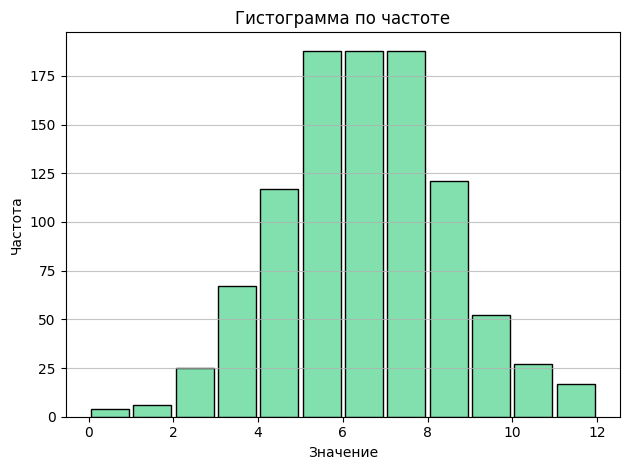

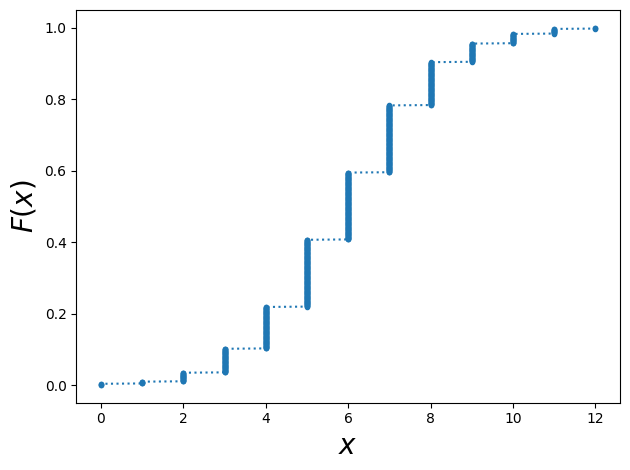

In [38]:
random_arr2 = np.round(np.random.normal(mean, std, n))           # вариационный ряд нормального распределения
random_arr2.sort()
r_arr_pdf2 = norm.pdf(random_arr2, mean, std)                        # плотность распределения
r_arr_cdf2 = norm.cdf(random_arr2, mean, std)                        # функция распределения

# гистограмма по частоте
bins = list(np.arange(np.min(random_arr2), np.max(random_arr2) + 0.2, 1.0))
plt.hist(random_arr2, bins = bins, color ='#82e0ae', edgecolor ='black', rwidth = 0.9)
plt.grid(axis = 'y', alpha = 0.75)
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.title('Гистограмма по частоте')
plt.tight_layout()
plt.show()

# график эмперической функции
ecdf = ECDF(random_arr2)
plt.plot(ecdf.x, ecdf.y, marker = '.', linestyle='dotted')
# sns.kdeplot(x2, cumulative=True)
plt.ylabel('$F(x)$', fontsize = 20)
plt.xlabel('$x$', fontsize = 20)
plt.tight_layout()
plt.show()

In [ ]:
total = np.sum(random_arr2)                               # сумма
median = np.median(random_arr2)                           # медиана
var = np.var(random_arr2)                                 # дисперсия
asd = np.std(random_arr2)                                 # среднеквадратичное отклонение
mse = np.sqrt(asd)/n                                      # cреднеквадратичная ошибка
r_arr_min = np.min(random_arr2)                           # минимум
r_arr_max = np.max(random_arr2)                           # максимум
uq = np.quantile(random_arr2, 0.75)                       # верхний квантиль
lq = np.quantile(random_arr2, 0.25)                       # нижний квантиль
coef_asym = skew(random_arr2, axis=0, bias=True)          # коэффициент асимметрии
coef_kurtosis = kurtosis(random_arr2, axis=0, bias=True)  # коэффициент эксцесса

print(f'Вариационный ряд = {random_arr2}')
print('\n\nОсновные статистики')
print(f'Сумма = {total}')
print(f'Медиана = {median}')
print(f'Дисперсия = {var}')
print(f'Стандартное отклонение = {asd}')
print(f'Среднеквадратичная ошибка = {mse}')
print(f'Минимум = {r_arr_min}')
print(f'Максимум = {r_arr_max}')
print(f'Размах = {r_arr_max - r_arr_min}')
print(f'Верхний квантиль = {uq}')
print(f'Нижний квантиль = {lq}')
print(f'Межквантильный размах = {uq - lq}')
print(f'Коэф. ассиметрии = {coef_asym}')
print(f'Коэф. эксцесса = {coef_kurtosis}')

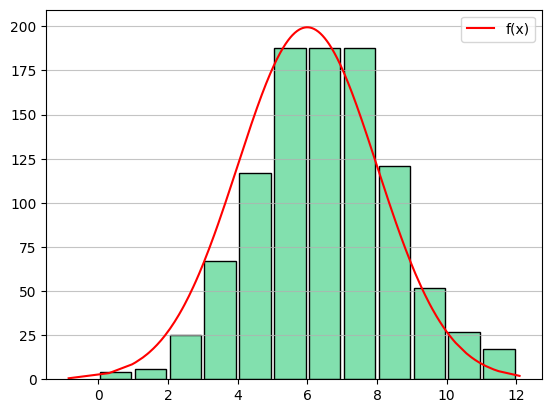

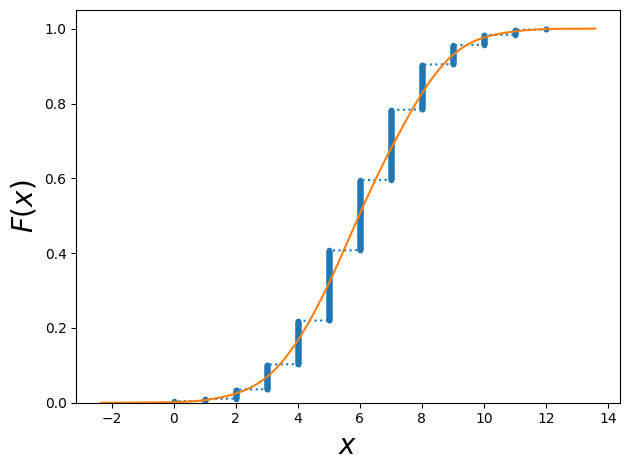

In [39]:
# Сравнение результатов
plt.plot(random_arr, r_arr_pdf * n, color='r', label='f(x)')
bins = list(np.arange(np.min(random_arr2), np.max(random_arr2) + 0.2, 1.0))
plt.hist(random_arr2, bins = bins, color ='#82e0ae', edgecolor ='black', rwidth = 0.9)
plt.grid(axis = 'y', alpha = 0.75)
plt.xlabel("")
plt.ylabel("")
plt.title("")
plt.legend()
plt.show()

ecdf = ECDF(random_arr2)
plt.plot(ecdf.x, ecdf.y, marker = '.', linestyle='dotted')
sns.kdeplot(random_arr, cumulative=True)
plt.ylabel('$F(x)$', fontsize = 20)
plt.xlabel('$x$', fontsize = 20)
plt.tight_layout()
plt.show()
